# Demo WL affinity tool (POC)

In [12]:
from pca.analytics import *
from knn.knn import *

,test_name,cpu_bound,cpi,branch_mispredict,retired_per_instr,llc_mpi,numa_reads_dram,upi_bw,fp_single_precision,fp_double_precision,...,dram_bw,frontend_bound,memory_bound,l1_bound,l2_bound,l3_bound,tma_data_sharing,store_bound,tma_core_bound,core_bound
0,605.mcf,0.964317,1.512149,0.057629,0.000060,0.001810,0.062926,8.238895,0.000000e+00,3.390000e-07,...,2850.290619,19.279603,32.524523,6.222513,2.982297,14.371958,0.001092,1.533234,13.979341,13.979341
1,654.roms,94.070135,3.930302,0.003176,0.000009,0.003223,35.830632,30390.318560,0.000000e+00,1.712471e-01,...,46538.934750,4.858439,75.057722,3.637622,26.640346,8.008338,0.000554,8.235535,7.519133,7.519133
2,603.bwaves,94.284162,3.818923,0.001057,0.000008,0.002399,17.813406,21152.994060,1.390000e-11,3.123111e-01,...,81220.196240,2.855501,76.468470,-4.205635,35.919342,5.442256,0.000066,13.411818,7.548197,7.548197
3,648.exchange2,0.967228,0.407160,0.015319,0.000023,0.000011,9.727213,6.657484,0.000000e+00,1.010000e-07,...,1.956988,19.971095,2.276561,5.202356,0.087285,0.334921,0.001120,0.073403,6.789632,6.789632
4,628.pop2,85.821820,10.620347,0.007894,0.000043,0.001274,25.496524,2766.186525,0.000000e+00,2.270360e-02,...,4258.748920,4.238429,74.346587,5.317337,0.844348,9.249450,0.001747,0.531158,16.575219,16.575219
5,649.fotonik3d,78.539701,6.431765,0.001823,0.000026,0.000311,25.301785,17615.447840,0.000000e+00,2.017287e-01,...,39644.483540,2.179303,85.256082,5.298704,28.566646,9.574494,0.000099,0.088062,4.744870,4.744870
6,644.nab,78.687374,1.132088,0.031606,0.000008,0.000141,43.328441,7483.547907,0.000000e+00,3.672597e-01,...,3263.197114,12.795515,19.058924,20.327393,0.667584,3.002671,0.000103,1.395446,18.663290,18.663290
7,641.leela,0.951205,0.893737,0.093897,0.000026,0.000016,10.805178,6.102550,4.016550e-04,2.610000e-06,...,1.748418,29.301197,6.429754,14.578254,0.924044,0.505077,0.000638,0.096884,6.697262,6.697262
8,638.imagick,83.976284,0.765806,0.006168,0.000001,0.000030,40.454482,1688.944218,4.479660e-04,3.075033e-01,...,2048.141255,25.031047,1.471927,20.793697,0.610447,0.925455,0.000236,0.305201,2.122474,2.122474
9,627.cam4,86.174586,2.877667,0.007226,0.000022,0.002519,12.482659,3167.019233,4.740000e-05,2.047354e-01,...,21251.530380,6.732321,63.550709,12.140095,1.544658,2.845011,0.000194,23.026134,13.365425,13.365425


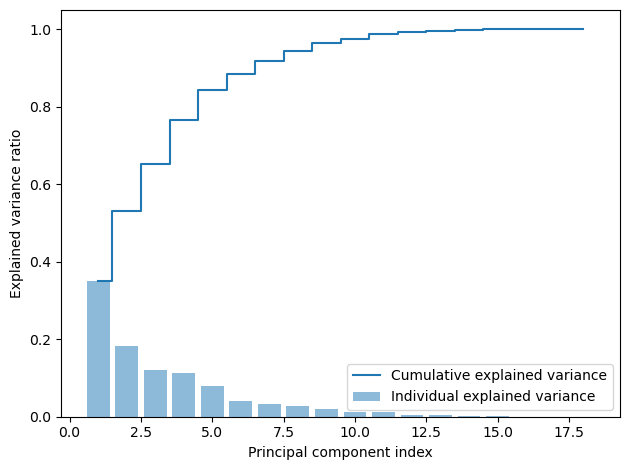

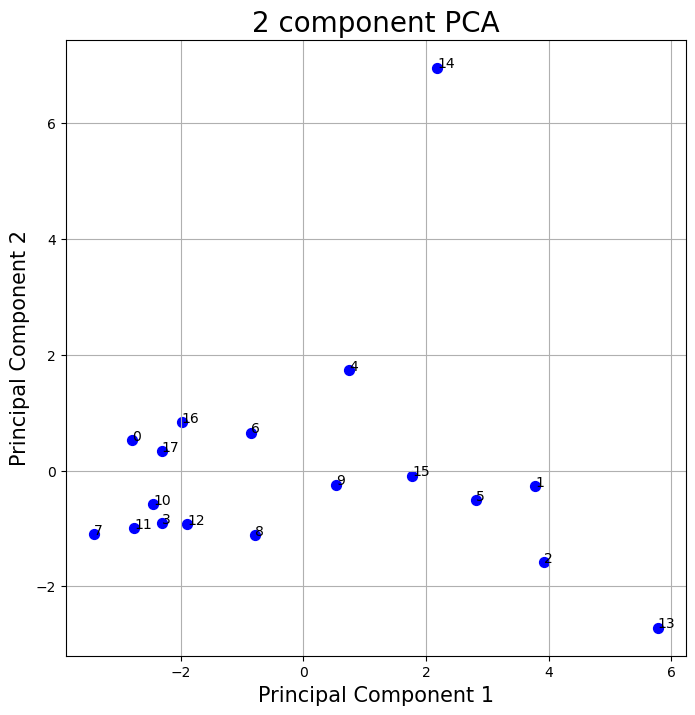

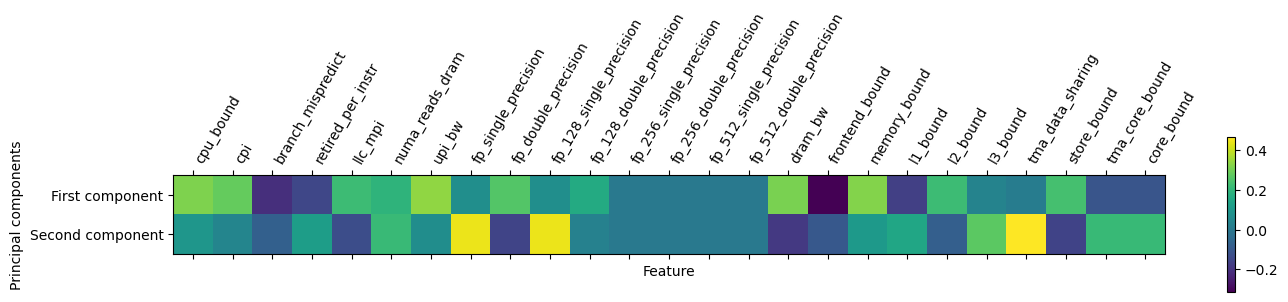

In [13]:
filename = None
pca_df = None

filename = 'post_silicon/skx_executions_emon/summary.csv'

#benchdnn
filename_new_test = 'post_silicon/skx_benchdnn/benchdnn_gated_results.csv'

#redis
#filename_new_test = '/Users/vrodri3/devel/emon-characterization/emon_post_pro/redis_results.csv'

label = "benchdnn"

if os.path.exists(filename):
    df = pd.read_csv(filename)
    df.fillna(0,inplace=True)
    display(df)
    features = list(df.columns)[1:]
    test_column = list(df.columns)[0]
    x = df.loc[:, features].values

    mean_v = (StandardScaler().fit(x).mean_)
    scale_v = (StandardScaler().fit(x).scale_)

    test_df = pd.read_csv(filename_new_test)
    test_array = np.asarray(test_df['results'])

    test_array_new = []

    for count, element in enumerate(test_array):
        test_array_new.append((element - mean_v[count]) / scale_v[count])

    pca_df, eig_vals, eig_vecs, X_std_main = get_PCA(
        df, features, test_column)

    test_df = pd.read_csv(filename_new_test)
    #pcas = project(df, test_array_new, label, eig_vals, eig_vecs, X_std_main, pca_df)

else:
    print("Error")
    print(f"./{sys.argv[0]} <reference set> <new test data> <label>")

## Calculate accuracy

,principal component 1,principal component 2,test_name,kind
0,3.930273,-1.582329,603_bwaves_s_result,1
1,-2.797509,0.528140,605.mcf_s_result,1
2,1.774780,-0.089779,607.cactuBSSN_s_result,0
3,5.774438,-2.716004,619.lbm_s_result,0
4,-2.306121,0.332565,620.omnetpp_s_result,0
5,2.177415,6.959385,621.wrf_s_result,0
6,-1.982709,0.832278,623.xalancbmk_s_result,0
7,-2.449201,-0.581078,625.x264_s.dat_result,0
8,0.535085,-0.244163,627.cam4_s_result,0
9,0.746410,1.737540,628.pop2_s_result,0


knn.score = 0.5


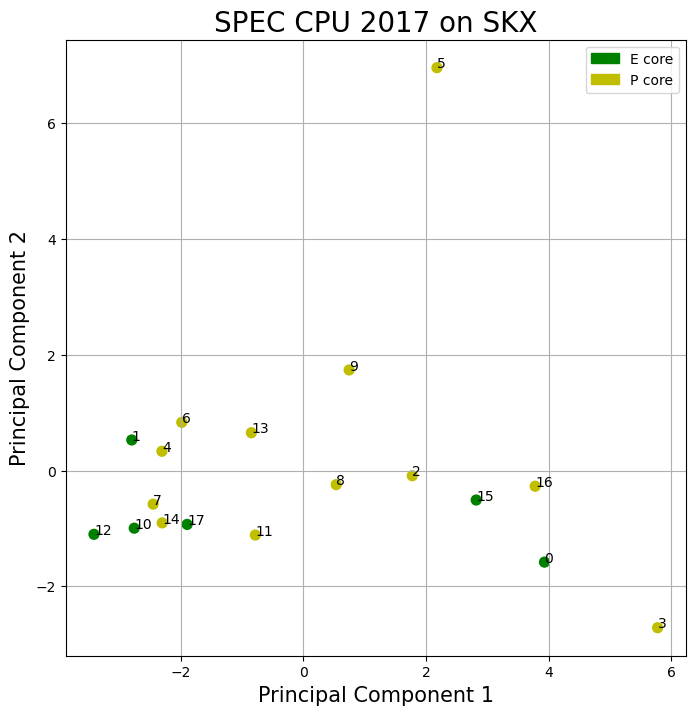

In [18]:
df = pd.read_csv('knn/spec_17_data_e_p.csv')
display(df)
# Split into training and test set
X = df[["principal component 1","principal component 2"]]
y = df[["kind"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train.values.ravel())

# Calculate the accuracy of the model
print(f'knn.score = {knn.score(X_test, y_test)}')

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('SPEC CPU 2017 on SKX', fontsize=20)
colors = np.where(df["kind"].astype(int)==1,'g','y')

mydict = {'E core': 'g',
          'P core': 'y'}

import matplotlib.patches as mpatches

fake_handles = [mpatches.Patch(color=item) for item in mydict.values()]
label = mydict.keys()
plt.legend(fake_handles, label, loc='upper right', prop={'size': 10})

ax.scatter(df['principal component 1'],df['principal component 2'], c=colors, s=50)
for i, label in enumerate(df['test_name']):
    plt.annotate(i, (df['principal component 1'][i], df['principal component 2'][i]))
#plt.scatter(pcas[0], pcas[1], c='red')
#plt.annotate("benchdnn", (pcas[0], pcas[1]))
ax.grid()
plt.show()


## Decission tree

In [26]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

df = pd.read_csv('knn/spec_17_data_e_p.csv')

# Split into training and test set
X = df[["principal component 1","principal component 2"]]
y = df[["kind"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)

regressor.score(X_test, y_test)


0.0

## BenchDNN

In [ ]:
#filename = 'knn/spec_17_data.csv'
filename = 'knn/spec_17_data_e_p.csv'

print(pcas)
#print(pcas.reshape((1, 2)))
#data = [[0.55391361, 0.19427444]]
data = pcas.reshape((1, 2))
prediction = knn_approximation(pd.read_csv(filename),data)
if prediction == 0:
    print("Predicted as P core")
else:
    print("Predicted as E core")


,principal component 1,principal component 2,test_name,kind
0,4.009628,-0.454752,603_bwaves_s_result,1
1,-2.631835,-2.304555,605.mcf_s_result,1
2,1.741262,0.165689,607.cactuBSSN_s_result,0
3,5.964517,-0.032001,619.lbm_s_result,0
4,-2.141028,-1.695253,620.omnetpp_s_result,0
5,1.969475,0.391350,621.wrf_s_result,0
6,-1.905180,-1.230605,623.xalancbmk_s_result,0
7,-2.398605,-0.800688,625.x264_s.dat_result,0
8,0.572974,-0.590363,627.cam4_s_result,0
9,0.772357,-2.142032,628.pop2_s_result,0


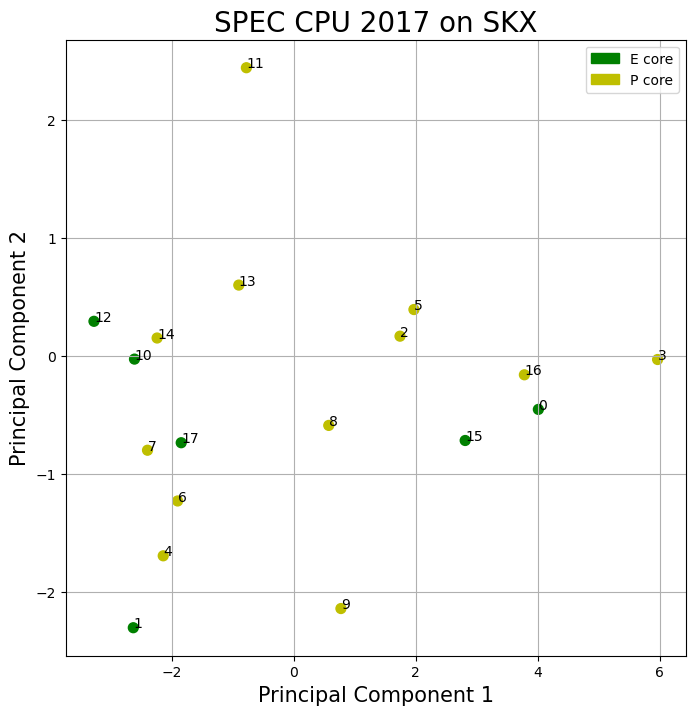

In [10]:
filename = 'knn/spec_17_data_e_p.csv'
df = pd.read_csv(filename)
display(df)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('SPEC CPU 2017 on SKX', fontsize=20)
colors = np.where(df["kind"].astype(int)==1,'g','y')

mydict = {'E core': 'g',
          'P core': 'y'}

import matplotlib.patches as mpatches

fake_handles = [mpatches.Patch(color=item) for item in mydict.values()]
label = mydict.keys()
plt.legend(fake_handles, label, loc='upper right', prop={'size': 10})

ax.scatter(df['principal component 1'],df['principal component 2'], c=colors, s=50)
for i, label in enumerate(df['test_name']):
    plt.annotate(i, (df['principal component 1'][i], df['principal component 2'][i]))
#plt.scatter(pcas[0], pcas[1], c='red')
#plt.annotate("benchdnn", (pcas[0], pcas[1]))
ax.grid()
plt.show()

In [ ]:
df = pd.read_csv(filename)
display(df)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('SPEC CPU 2017 on SKX', fontsize=20)
colors = np.where(df["kind"].astype(int)==1,'g','y')

mydict = {'E core': 'g',
          'P core': 'y'}

import matplotlib.patches as mpatches

fake_handles = [mpatches.Patch(color=item) for item in mydict.values()]
label = mydict.keys()
plt.legend(fake_handles, label, loc='upper right', prop={'size': 10})

ax.scatter(df['principal component 1'],df['principal component 2'], c=colors, s=50)
for i, label in enumerate(df['test_name']):
    plt.annotate(i, (df['principal component 1'][i], df['principal component 2'][i]))
#plt.scatter(pcas[0], pcas[1], c=np.where(prediction==1,'g','y'))
#plt.annotate("benchdnn", (pcas[0], pcas[1]))
ax.grid()
plt.show()

## REDIS-MEMTIER

In [ ]:
filename = None
pca_df = None

filename = 'post_silicon/summary.csv'

#redis
filename_new_test = '/Users/vrodri3/devel/emon-characterization/emon_post_pro/redis_results.csv'

label = "redis-memtier"

if os.path.exists(filename):
    df = pd.read_csv(filename)
    display(df)
    features = list(df.columns)[1:]
    test_column = list(df.columns)[0]
    x = df.loc[:, features].values

    mean_v = (StandardScaler().fit(x).mean_)
    scale_v = (StandardScaler().fit(x).scale_)

    test_df = pd.read_csv(filename_new_test)
    test_array = np.asarray(test_df['results'])

    test_array_new = []

    for count, element in enumerate(test_array):
        test_array_new.append((element - mean_v[count]) / scale_v[count])

    pca_df, eig_vals, eig_vecs, X_std_main = get_PCA(
        df, features, test_column)

    test_df = pd.read_csv(filename_new_test)
    pcas = project(df, test_array_new, label, eig_vals, eig_vecs, X_std_main, pca_df)

else:
    print("Error")
    print(f"./{sys.argv[0]} <reference set> <new test data> <label>")

In [ ]:
filename = 'knn/spec_17_data_e_p.csv'

print(pcas)
#print(pcas.reshape((1, 2)))
#data = [[0.55391361, 0.19427444]]
data = pcas.reshape((1, 2))
prediction = knn_approximation(pd.read_csv(filename),data)
if prediction == 0:
    print("Predicted as P core")
else:
    print("Predicted as E core")


In [ ]:
df = pd.read_csv(filename)
display(df)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('SPEC CPU 2017 on SKX', fontsize=20)
colors = np.where(df["kind"].astype(int)==1,'g','y')

mydict = {'E core': 'g',
          'P core': 'y'}

import matplotlib.patches as mpatches

fake_handles = [mpatches.Patch(color=item) for item in mydict.values()]
label = mydict.keys()
plt.legend(fake_handles, label, loc='upper right', prop={'size': 10})

ax.scatter(df['principal component 1'],df['principal component 2'], c=colors, s=50)
for i, label in enumerate(df['test_name']):
    plt.annotate(i, (df['principal component 1'][i], df['principal component 2'][i]))
plt.scatter(pcas[0], pcas[1], c=np.where(prediction==1,'g','y'))
plt.annotate("redis-memtier", (pcas[0], pcas[1]))
ax.grid()
plt.show()